In [1]:
import numpy as np
import pandas as pd
import re
from pandas import DataFrame
from sqlalchemy import create_engine
from matplotlib import pyplot as plt
import matplotlib as mpl
from math import log

%matplotlib inline

In [2]:
# Connecting to the db
host_db = "cal-patent-lab.chhaitskv8dz.us-west-2.rds.amazonaws.com"
username = "***REMOVED***"
password = "***REMOVED***"
db = "***REMOVED***"

engine = create_engine("mysql://{}:{}@{}/{}".format(
    username, password, host_db, db))
connection = engine.connect()
q = "select patent_info.patent_id, patent_info.art_unit, datediff(patent_info.issue_date, patent_info.filing_date) as app2grant, datediff(ptab_cases.filing_date, patent_info.issue_date) as grant2challenge, datediff(ptab_cases.decision_date, ptab_cases.filing_date) as challenge2decision, ptab_cases.invalidated, ptab_cases.denied from patent_info, ptab_cases where patent_info.patent_id = ptab_cases.patent_id;"
patent_ptab_df = pd.read_sql(q, engine)
connection.close()

In [3]:
clean_df = patent_ptab_df.dropna(axis=0, how="any")

In [4]:
inval = clean_df[clean_df.invalidated == 1]
not_inval = clean_df[clean_df.invalidated == 0]
denied = clean_df[clean_df.denied == 1]
not_denied = clean_df[clean_df.denied == 0]

app2grant_data = {'not_invalidated' : not_inval.app2grant, 'invalidated' : inval.app2grant, "denied" : denied.app2grant, "not_denied" : not_denied.app2grant}
app2grant_df = pd.DataFrame(data=app2grant_data)
print("Application-to-grant time")
print("Means")
print(app2grant_df.mean())
print("Standard deviations")
print(app2grant_df.std())

Application-to-grant time
Means
denied             1173.292804
invalidated        1076.357606
not_denied         1088.524841
not_invalidated    1173.913103
dtype: float64
Standard deviations
denied             793.170202
invalidated        703.324244
not_denied         704.402981
not_invalidated    786.261077
dtype: float64


Distributions of app2grant intervals


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa83beae4d0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7fa83bd24c10>]], dtype=object)

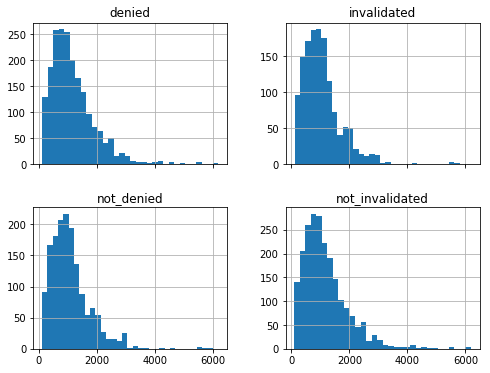

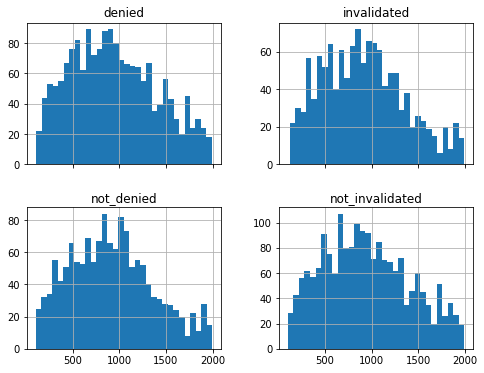

In [5]:
print("Distributions of app2grant intervals")
app2grant_df.hist(sharex=True, bins=32, figsize=(8,6))
app2grant_df[app2grant_df < 2000].hist(sharex=True, bins=32, figsize=(8,6))

In [6]:
grant2challenge_data = {'not_invalidated' : not_inval.grant2challenge, 'invalidated' : inval.grant2challenge, "not_denied" : not_denied.grant2challenge, "denied" : denied.grant2challenge}
grant2challenge_df = pd.DataFrame(data=grant2challenge_data)
print("Grant-to-challenge time")
print("Means")
print(grant2challenge_df.mean())
print("Standard deviations")
print(grant2challenge_df.std())

Grant-to-challenge time
Means
denied             2413.459057
invalidated        2452.178082
not_denied         2411.923567
not_invalidated    2387.929481
dtype: float64
Standard deviations
denied             1893.444105
invalidated        1836.010399
not_denied         1821.659026
not_invalidated    1878.351489
dtype: float64


Distributions of grant2challenge intervals


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa83b39d310>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7fa83b20dfd0>]], dtype=object)

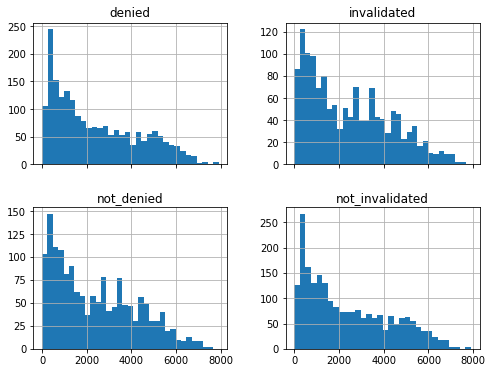

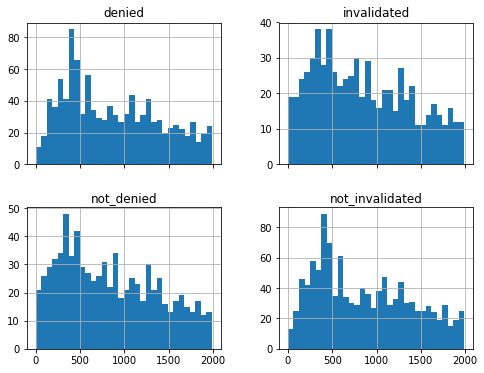

In [7]:
print("Distributions of grant2challenge intervals")
grant2challenge_df.hist(sharex=True, bins=32, figsize=(8,6))
grant2challenge_df[grant2challenge_df < 2000].hist(sharex=True, bins=32, figsize=(8,6))

In [8]:
challenge2decision_data = {'not_invalidated' : not_inval.challenge2decision, 'invalidated' : inval.challenge2decision, "not_denied" : not_denied.challenge2decision, "denied" : denied.challenge2decision}
challenge2decision_df = pd.DataFrame(data=challenge2decision_data)
print("Challenge-to-decision time")
print("Means")
print(challenge2decision_df.mean())
print("Standard deviations")
print(challenge2decision_df.std())

Challenge-to-decision time
Means
denied             160.298759
invalidated        177.270368
not_denied         177.628025
not_invalidated    161.967243
dtype: float64
Standard deviations
denied             41.613749
invalidated        28.160763
not_denied         27.720548
not_invalidated    40.815713
dtype: float64


Distributions of challenge2decision intervals


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa83ad83090>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7fa83abf2d50>]], dtype=object)

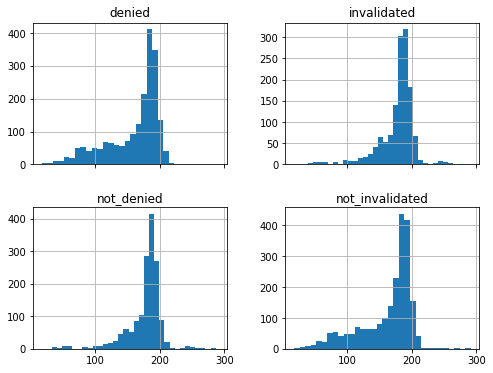

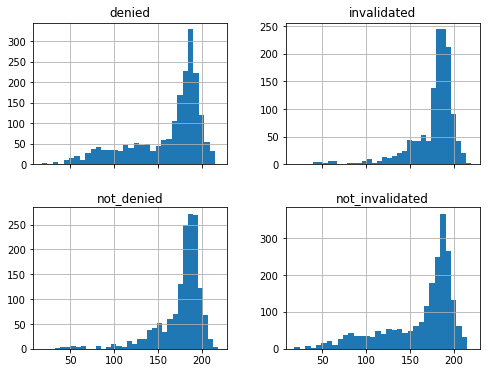

In [9]:
print("Distributions of challenge2decision intervals")
challenge2decision_df.hist(sharex=True, bins=32, figsize=(8,6))
challenge2decision_df[challenge2decision_df < 220].hist(sharex=True, bins=32, figsize=(8,6))

App2grant vs. grant2challenge, invalidated vs. not invalidated


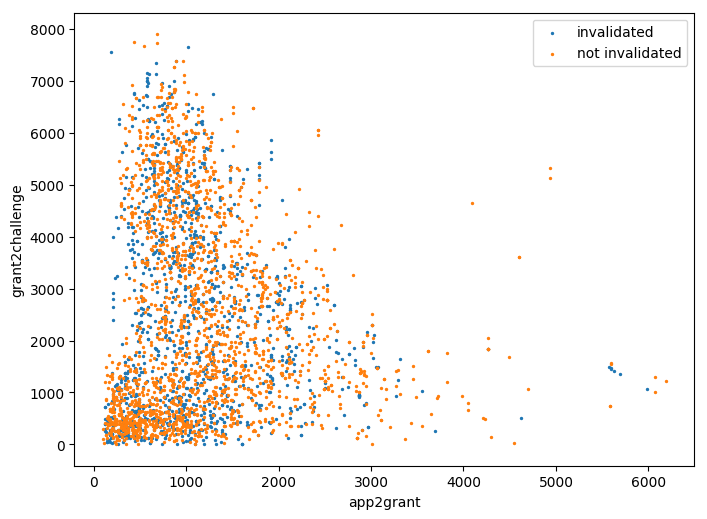

In [10]:
plt.figure(figsize=(8,6), dpi=100)
plt.scatter(app2grant_df.invalidated, grant2challenge_df.invalidated, s=2)
plt.scatter(app2grant_df.not_invalidated, grant2challenge_df.not_invalidated, s=2)
plt.xlabel('app2grant')
plt.ylabel('grant2challenge')
ax = plt.gca()
ax.legend(labels=['invalidated', 'not invalidated'])
print("App2grant vs. grant2challenge, invalidated vs. not invalidated")

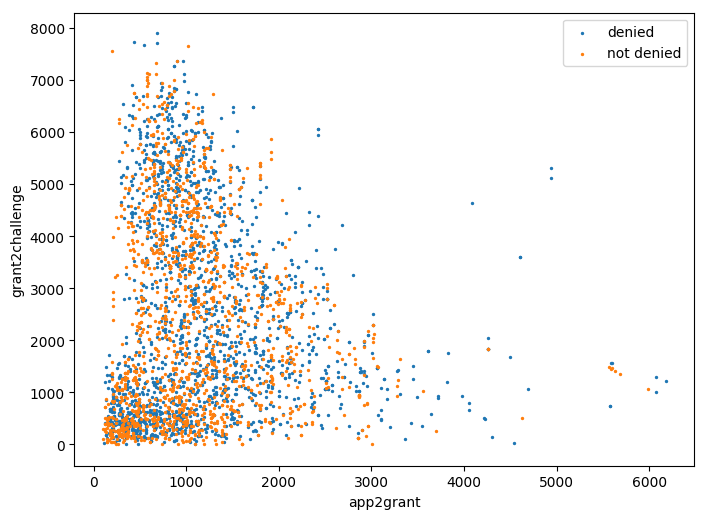

In [11]:
plt.figure(figsize=(8,6), dpi=100)
plt.scatter(app2grant_df.denied, grant2challenge_df.denied, s=2)
plt.scatter(app2grant_df.not_denied, grant2challenge_df.not_denied, s=2)
plt.xlabel('app2grant')
plt.ylabel('grant2challenge')
ax = plt.gca()
ax.legend(labels=['denied', 'not denied'])

App2grant vs. challenge2decision, invalidated vs. not invalidated


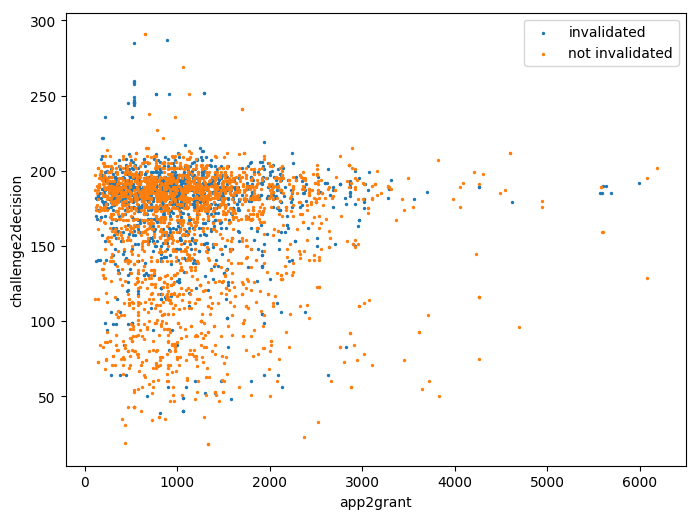

In [12]:
plt.figure(figsize=(8,6), dpi=100)
plt.scatter(app2grant_df.invalidated, challenge2decision_df.invalidated, s=2)
plt.scatter(app2grant_df.not_invalidated, challenge2decision_df.not_invalidated, s=2)
plt.xlabel('app2grant')
plt.ylabel('challenge2decision')
ax = plt.gca()
ax.legend(labels=['invalidated', 'not invalidated'])
print("App2grant vs. challenge2decision, invalidated vs. not invalidated")

App2grant vs. challenge2decision, denied vs. not denied


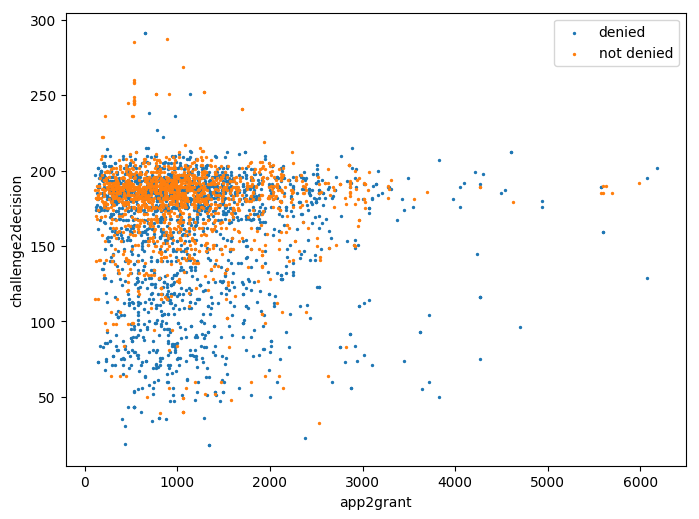

In [13]:
plt.figure(figsize=(8,6), dpi=100)
plt.scatter(app2grant_df.denied, challenge2decision_df.denied, s=2)
plt.scatter(app2grant_df.not_denied, challenge2decision_df.not_denied, s=2)
plt.xlabel('app2grant')
plt.ylabel('challenge2decision')
ax = plt.gca()
ax.legend(labels=['denied', 'not denied'])
print("App2grant vs. challenge2decision, denied vs. not denied")

Grant2challenge vs. challenge2decision, invalidated vs. not invalidated


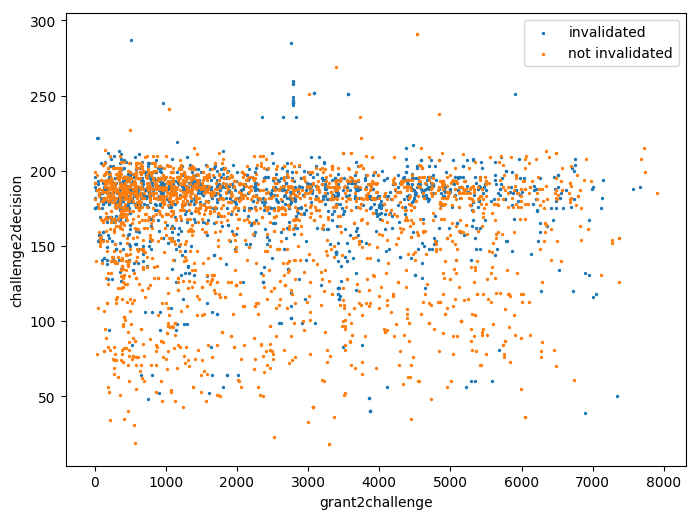

In [14]:
plt.figure(figsize=(8,6), dpi=100)
plt.scatter(grant2challenge_df.invalidated, challenge2decision_df.invalidated, s=2)
plt.scatter(grant2challenge_df.not_invalidated, challenge2decision_df.not_invalidated, s=2)
plt.xlabel('grant2challenge')
plt.ylabel('challenge2decision')
ax = plt.gca()
ax.legend(labels=['invalidated', 'not invalidated'])
print("Grant2challenge vs. challenge2decision, invalidated vs. not invalidated")

Grant2challenge vs. challenge2decision, denied vs. not denied


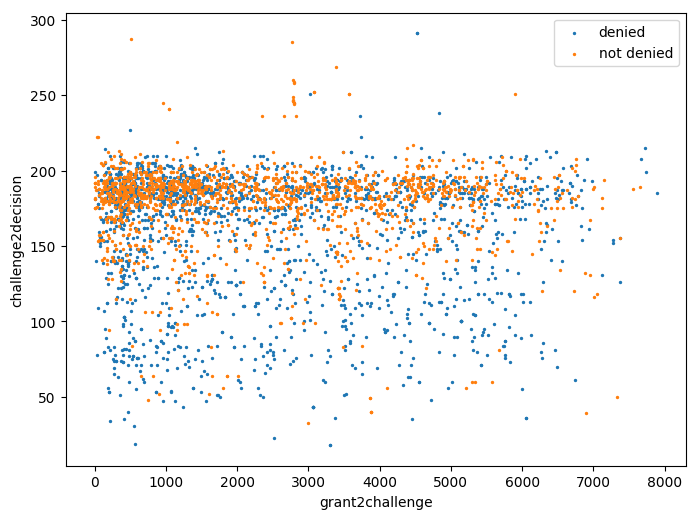

In [15]:
plt.figure(figsize=(8,6), dpi=100)
plt.scatter(grant2challenge_df.denied, challenge2decision_df.denied, s=2)
plt.scatter(grant2challenge_df.not_denied, challenge2decision_df.not_denied, s=2)
plt.xlabel('grant2challenge')
plt.ylabel('challenge2decision')
ax = plt.gca()
ax.legend(labels=['denied', 'not denied'])
print("Grant2challenge vs. challenge2decision, denied vs. not denied")